# Episode-2

    0 : land_x 0, land_y 100
    1 : land_x 1000, land_y 500
    2 : land_x 1500, land_y 1500
    3 : land_x 3000, land_y 1000
    4 : land_x 4000, land_y 150
    5 : land_x 5500, land_y 150
    6 : land_x 6999, land_y 800
    

In [1]:
import numpy as np
from typing import List, Optional, Callable, Tuple, Dict, Union  # OneNote2021 #_python_ #_typing_
GENE = List[int]  # (rotate (-15 ~ +15),power (-1, 0, +1)) 避免無用的值域，下給 Web site 的 command 要轉換成 (rotate(-90 ~ +90), power(0,1,2,3,4))
GENOME = List[GENE]  # Genome 是一個 list 裡面都是 int
STATE = Dict[str,Union[int,float,np.array]]  # x,y,hspeed,power,.. etc 

# Get modules and peforth tools
import random, json, math, copy
from itertools import permutations  # permutations 數學「排列組合」中的「排列」
import IPython

In [2]:
# 抓進 peforth 以及外加功能
%run forth.py

reDef unknown
reDef -->
p e f o r t h    v1.26
source code http://github.com/hcchengithub/peforth
Type 'peforth.ok()' to enter forth interpreter, 'exit' to come back.



### 兩線相交的偵測程式

In [3]:
# path 太長好像 %run 不了，先到當地去 "subst g: . " 把整條 path 變成 x: 就好辦了
# !subst x: /d
# !subst x: "c:\Users\8304018\OneDrive\文件\Jupyter Notebooks\Differences of np.dot and np.multiply"
# doIntersect(p1:Vector, q1:Vector, p2:Vector, q2:Vector) -> boolean
%run x:\How_to_check_if_two_line_segments_intersect.ipynb

### 點到線段的距離

In [4]:
# Calculate the euclidian distance between an array of points to a line segment in Python without for loop
# https://stackoverflow.com/questions/54442057/calculate-the-euclidian-distance-between-an-array-of-points-to-a-line-segment-in
# OneDrive/文件/Jupyter Notebooks/Differences of np.dot and np.multiply/intro_2_vector.ipynb
# lineseg_dists(p:[Vector], a:Vector, b:Vector) -> [float]

def lineseg_dists(p, a, b):
    # where p is an array of points, a,b is the line segment
    # lineseg_dists(p:[Vector], a:Vector, b:Vector) -> [float]
    
    if np.all(a == b):
        return np.linalg.norm(p - a, axis=1)  # a-b 是一個點，直接取 p-a 就是答案。 p 

    # normalized tangent vector
    d = np.divide(b - a, np.linalg.norm(b - a))

    # signed parallel distance components
    s = np.dot(a - p, d)  # a-p 在 d 上的投影
    t = np.dot(p - b, d)  # p-b 在 d 上的投影

    # clamped parallel distance
    h = np.maximum.reduce([s, t, np.zeros(len(p))])  # h 是
    
    # perpendicular distance component, as before
    # note that for the 3D case these will be vectors
    c = np.cross(p - a, d)

    # use hypot for Pythagoras to improve accuracy
    result = np.hypot(h, c)
    
    return result

# 點 [1,1] 在線的右上邊，距離是正的；點 [0,0] 在線的左下邊，距離也是正的，所以它沒有分正負。
p = np.array([[1,1],[0,0]])  # the point
a = np.array([1,0])  # the line start
b = np.array([0,1])  # the line end
distance = lineseg_dists(p, a, b)
%f distance -->

# 這組實驗證實 lineseg_dists() 無誤
p = np.array([[-1,0.5],[0,0],[0,0.5],[0.5,0.5],[1,0],[1,0.5],[2,0.5]])  # the point
a = np.array([0,0])  # the line start
b = np.array([1,0])  # the line end
distance = lineseg_dists(p, a, b)
%f distance -->

11>11>

 bd* exit


distance --> [0.70710678 0.70710678] (<class 'numpy.ndarray'>)
distance --> [1.11803399 0.         0.5        0.5        0.         0.5
 1.11803399] (<class 'numpy.ndarray'>)


# 直接讀 log 檔
So the `%store log` is from here

In [2]:
# Read back the json file which was saved by the above cell.
%f s" episode2-original.json" readTextFile py> eval(pop()) constant log // ( -- json ) "actual free fall.json" log from Codingame > Mars Lander > episode-1 
log = peforth.execute('log').pop()
%f log -->
%store log

log --> [{'step': 0, 'length': 73, 'x': 2500, 'y': 2700, 'hspeed': 0, 'vspeed': 0, 'fuel': 550, 'angle': 0, 'power': 0, 'cmd': [-99, -99]}, {'step': 1, 'length': 73, 'x': 2500, 'y': 2699, 'hspeed': 0, 'vspeed': -3, 'fuel': 549, 'angle': -15, 'power': 1, 'cmd': [-20, 3]}, {'step': 2, 'length': 73, 'x': 2501, 'y': 2695, 'hspeed': 1, 'vspeed': -5, 'fuel': 547, 'angle': -20, 'power': 2, 'cmd': [-20, 3]}, {'step': 3, 'length': 73, 'x': 2502, 'y': 2690, 'hspeed': 2, 'vspeed': -5, 'fuel': 544, 'angle': -20, 'power': 3, 'cmd': [-20, 3]}, {'step': 4, 'length': 73, 'x': 2505, 'y': 2684, 'hspeed': 3, 'vspeed': -6, 'fuel': 541, 'angle': -20, 'power': 3, 'cmd': [-20, 3]}, {'step': 5, 'length': 73, 'x': 2508, 'y': 2677, 'hspeed': 4, 'vspeed': -7, 'fuel': 538, 'angle': -20, 'power': 3, 'cmd': [-20, 3]}, {'step': 6, 'length': 73, 'x': 2513, 'y': 2670, 'hspeed': 5, 'vspeed': -8, 'fuel': 535, 'angle': -20, 'power': 3, 'cmd': [-20, 3]}, {'step': 7, 'length': 73, 'x': 2518, 'y': 2661, 'hspeed': 6, 'vspeed

# 最基本的定義 

In [5]:
Gravity = 3.711        # constant on Mars
G = Gravity             # 到了二維以上，重力需轉成向量
Altitude = 150          # altitude of the flat 
VSpeed = 40             # target virtical speed 
HSpeed = 20             # target horizental speed 
fuel0 = 550             # episode-2

# Parameters

round_off = 2           # 顯示到小數點以下兩位避免太長

In [6]:
class Vector:
    def __init__(self, x:float,y:float):
        self.x = x
        self.y = y

    def __mul__(self, x:float):
        m = self.v() * x 
        return Vector(*m)  # Vector(m[0], m[1])  np.array 也可以直接 unpack or distructing 
    
    def __add__(self, x):
        m = self.v() + x.v() 
        return Vector(*m)  # Vector(m[0], m[1])  np.array 也可以直接 unpack or distructing 

    def v(self) -> np.array:
        # A vector is a np.array
        return np.array([self.x,self.y])

    def n(self) -> float:
        # norm of a vector is its length
        return np.linalg.norm(self.v())

    def u(self) -> np.array:
        # Shrink the given vector into an unit vector. https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
        return self if round(self.n(),6) == 0. else self.v()/self.n();  # 考慮周詳
    
    def __str__(self) -> str:
        return 'Vec' + str(np.array([round(self.x,round_off),round(self.y,round_off)]))
    
%f Vector :> (3,4) -->
%f Vector :> (3,4).v() -->
%f Vector :> (3,4).x -->
%f Vector :> (3,4).y -->
%f Vector :> (3,4).n() -->
%f Vector :> (3,4).u() -->
%f Vector :> (0.6,0.8).n() -->
%f Vector :> (0.6,0.8)*2 -->    

Vector :> (3,4) --> Vec[3 4] (<class '__main__.Vector'>)
Vector :> (3,4).v() --> [3 4] (<class 'numpy.ndarray'>)
Vector :> (3,4).x --> 3 (<class 'int'>)
Vector :> (3,4).y --> 4 (<class 'int'>)
Vector :> (3,4).n() --> 5.0 (<class 'numpy.float64'>)
Vector :> (3,4).u() --> [0.6 0.8] (<class 'numpy.ndarray'>)
Vector :> (0.6,0.8).n() --> 1.0 (<class 'numpy.float64'>)
Vector :> (0.6,0.8)*2 --> Vec[1.2 1.6] (<class '__main__.Vector'>)


In [7]:
class Angle(Vector):
    def __init__(self, an:float) -> Vector:
        # Convert the given absolute angle in degrees to a unit vector that represents the angle
        v = Vector(math.cos(np.deg2rad(an + 90)), math.sin(np.deg2rad(an + 90)))
        self.x, self.y = v.x, v.y  # 已經是單位向量，無須這樣 v.u()[0], v.u()[1] 

%f Angle :> (-180) :> v() -->
%f Angle :> (-180) -->
%f Angle :> (90)   -->
%f Angle :> (-90)  -->   
%f Angle :> (180)  -->   
%f Angle :> (45)   -->   
%f Angle :> (-45)  -->   
%f Angle :> (-45) type -->   
    

Angle :> (-180) :> v() --> [ 6.123234e-17 -1.000000e+00] (<class 'numpy.ndarray'>)
Angle :> (-180) --> Vec[ 0. -1.] (<class '__main__.Angle'>)
Angle :> (90)   --> Vec[-1.  0.] (<class '__main__.Angle'>)
Angle :> (-90)  --> Vec[1. 0.] (<class '__main__.Angle'>)
Angle :> (180)  --> Vec[-0. -1.] (<class '__main__.Angle'>)
Angle :> (45)   --> Vec[-0.71  0.71] (<class '__main__.Angle'>)
Angle :> (-45)  --> Vec[0.71 0.71] (<class '__main__.Angle'>)
Angle :> (-45) type --> <class '__main__.Angle'> (<class 'type'>)


In [8]:
G = Angle(180) * Gravity  # G = Vector(*(Angle(180).v() * Gravity)) 我有提供 __mul__ 

%f G -->
%f G type --> 


G --> Vec[-0.   -3.71] (<class '__main__.Vector'>)
G type --> <class '__main__.Vector'> (<class 'type'>)


In [9]:
class State():

    def __init__(self, step=0, x=2500, y=2700, hspeed=0, vspeed=0, fuel=550, angle=0, power=0):
        self.step   = step
        self.x      = x
        self.y      = y
        self.hspeed = hspeed
        self.vspeed = vspeed
        self.fuel   = fuel
        self.angle  = angle
        self.power  = power
        # self.force  = G + Angle(self.angle)*self.power

    def next(self, angle:int, power:int):  
        # input angle,power 都是 offset differential delta 分別屬 -15~15 以及 -1,0,+1 
        assert power in [-1, 0, 1], 'expected input power [-1, 0, +1], given {}'.format(power)
        assert angle in range(-15,16), 'input angle range [-15:16], given {}'.format(angle)
        self.step   += 1
        self.angle  += angle
        self.angle   = -90 if self.angle < -90 else self.angle
        self.angle   =  90 if self.angle > 90 else self.angle
        self.power  += power
        self.power   = 0 if self.power < 0 else self.power
        self.power   = 4 if self.power > 4 else self.power
        self.fuel   -= self.power
     #  self.x       = self.x       # episode-1 不變
     #  self.y       = self.y + self.vspeed + (1/2)*self.force
     #  self.hspeed  = self.hspeed  # episode-1 不變
     #  self.vspeed += self.force
        force = G + Angle(self.angle)*self.power  # force on the ship during this step         
        s0 = Vector(self.hspeed,self.vspeed)
        p0 = Vector(self.x,self.y)
        s1 = s0 + force 
        p1 = p0 + s0 + force*0.5
        self.x, self.y = p1.x, p1.y
        self.hspeed, self.vspeed = s1.x, s1.y
        return self  # 傳回值只是方便測試，可以這樣寫： %f state :> next(0,3.711) -->

    def __str__(self):  
        d = copy.deepcopy(self.__dict__)
        return str([{k:int(round(v,0))} for k,v in d.items()])

state0 = State(0,2500,2700,0,0,fuel0,0,0)  # episode-2 的起點 state

In [13]:
%f be*
state = State(**state0.__dict__)
%f state -->
%f state :> next(-15,1) -->
%f state :> next(-5,1) -->
%f state :> next(0,1) -->
for i in range(50):
    state.next(0,0)
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->
%f state :> next(0,0) -->


state --> [{'step': 0}, {'x': 2500}, {'y': 2700}, {'hspeed': 0}, {'vspeed': 0}, {'fuel': 550}, {'angle': 0}, {'power': 0}] (<class '__main__.State'>)
state :> next(-15,1) --> [{'step': 1}, {'x': 2500}, {'y': 2699}, {'hspeed': 0}, {'vspeed': -3}, {'fuel': 549}, {'angle': -15}, {'power': 1}] (<class '__main__.State'>)
state :> next(-5,1) --> [{'step': 2}, {'x': 2501}, {'y': 2695}, {'hspeed': 1}, {'vspeed': -5}, {'fuel': 547}, {'angle': -20}, {'power': 2}] (<class '__main__.State'>)
state :> next(0,1) --> [{'step': 3}, {'x': 2502}, {'y': 2690}, {'hspeed': 2}, {'vspeed': -5}, {'fuel': 544}, {'angle': -20}, {'power': 3}] (<class '__main__.State'>)
state :> next(0,0) --> [{'step': 54}, {'x': 3937}, {'y': 1251}, {'hspeed': 54}, {'vspeed': -51}, {'fuel': 391}, {'angle': -20}, {'power': 3}] (<class '__main__.State'>)
state :> next(0,0) --> [{'step': 55}, {'x': 3992}, {'y': 1200}, {'hspeed': 55}, {'vspeed': -52}, {'fuel': 388}, {'angle': -20}, {'power': 3}] (<class '__main__.State'>)
state :> ne

In [9]:
assert False

AssertionError: 

In [11]:
# 全部下 -20,3 取 footprints list
state = State(**state0.__dict__)  # init for ecah genome
footprints = []
%f state :: next(-15,1)
footprints.append([int(round(state.x,0)),int(round(state.y,0))])
%f state :: next(-5,1)
footprints.append([int(round(state.x,0)),int(round(state.y,0))])
%f state :: next(0,1)
footprints.append([int(round(state.x,0)),int(round(state.y,0))])
for i in range(70):
    %f state :: next(0,0)
    footprints.append([int(round(state.x,0)),int(round(state.y,0))])
# %f footprints -->
thread=np.array(footprints)
%f thread :> [0:3] -->
%f ( x ) thread :> [:,0] -->
%f ( y ) thread :> [:,1] -->

thread :> [0:3] --> [[2500 2699]
 [2501 2695]
 [2502 2690]] (<class 'numpy.ndarray'>)
( x ) thread :> [:,0] --> [2500 2501 2502 2505 2508 2513 2518 2525 2532 2541 2551 2561 2573 2586
 2600 2614 2630 2647 2665 2684 2704 2725 2747 2770 2794 2819 2845 2872
 2900 2929 2960 2991 3023 3056 3091 3126 3162 3200 3238 3277 3318 3359
 3402 3445 3490 3535 3582 3630 3678 3728 3779 3830 3883 3937 3992 4048
 4105 4162 4221 4281 4342 4404 4467 4531 4596 4662 4730 4798 4867 4937
 5008 5081 5154] (<class 'numpy.ndarray'>)
( y ) thread :> [:,1] --> [2699 2695 2690 2684 2677 2670 2661 2651 2641 2630 2618 2605 2591 2576
 2560 2543 2526 2508 2488 2468 2447 2425 2402 2378 2354 2328 2302 2275
 2246 2217 2187 2156 2125 2092 2058 2024 1988 1952 1915 1877 1838 1798
 1758 1716 1674 1630 1586 1541 1495 1448 1400 1351 1302 1251 1200 1147
 1094 1040  985  929  873  815  756  697  637  575  513  450  386  322
  256  189  122] (<class 'numpy.ndarray'>)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


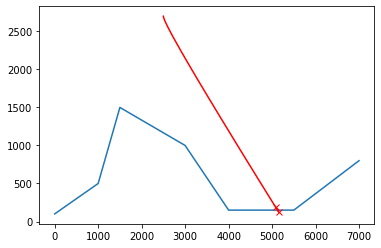

In [20]:
%pylab
%matplotlib inline
x = [0, 1000, 1500, 3000, 4000, 5500, 6999]
y = [100, 500, 1500, 1000, 150, 150, 800]
# plt.plot(x,y,'',thread[:,0],thread[:,1],'r',thread[-2:,0],thread[-2:,1],'rx');  # 這行等於以下三行，三個 args 一組。
plt.plot(x,y,'')  # 地形
plt.plot(thread[:,0],thread[:,1],'r')  # 整條 trace 
plt.plot(thread[-2:,0],thread[-2:,1],'rx');  # 最後兩點打上標記


In [ ]:
for i in range(9):
    state.next(0,0);
    sample_genomes["安全降落"].append([0,0])
for i in range(9,91):
    state.next(0,1);
    sample_genomes["安全降落"].append([0,1])
state_list["安全降落"]=state

In [ ]:
# 改寫 for Mars Lander 乍看以為要頭痛一會兒，其實 Mars Lander 的 genome 很簡單，就是一串 (int,int) 
# pairs 而已。前面基礎討論有提到，以 SA 而言就是 mutate 某一個 gene 也就是 command pair 而已。但是考慮 Mars
# Lander 的限制條件，以 epidode-1 而言，command 的改變要做的決定是 -1 0 +1 其中之一才對，而非 0~4. 

# 長度的問題，
# 太長而無效的 genes 要 cut 掉。
# 長度不夠時直接 copy 最後一個 gene 頂替即可。
# 會發現 genome 太長或不夠的是 simulator 那就是由它處理。

# 1. 避免無效的 neighbour 例如前一 power 是 0 或 4 卻下 -1 或 1 就是無效的，這個 neighbour 就浪費了。 
# 2. 第一個 gene 的 power 不能下 -1 只能下 0 或 +1 , 將來 angle 也有一樣的限制。

def get_random_neighbour(genome: GENOME) -> None :
    neighbour = copy.deepcopy(genome)  # 利用 [:] slice copy 不行！
    commands = genome_to_command_list(neighbour)  # 絕對 command, 用來檢查前一狀態避免產生無效的 neighbour 
    
    while True:  # 試到不一樣了才出來
        idx = random.randint(0,len(genome)-1) # 選 1 個 gene 
        cmd = random.randint(-1, 1)  # -1, 0, +1 當中選 1 個 thrust command (episode-1)
        if idx == 0 and cmd == -1 : continue  # 一開始的 power 就是 0 再下 -1 無效
        if idx >= 1 and cmd == -1 and commands[idx-1][1] == 0: continue  # 前一個 power 就已經是 0 又下 -1 無效
        if idx >= 1 and cmd ==  1 and commands[idx-1][1] == 4: continue  # 前一個 power 就已經是 4 又下 +1 無效
        if neighbour[idx][1] == cmd: continue  # 沒有變化當然無效
        else: 
            neighbour[idx][1] = cmd
            break
            
    return neighbour
%f get_random_neighbour :> ([[0,0],[0,0]]) ( 都不可能出現 -1 ) -->    
%f get_random_neighbour :> ([[0,0],[0,1]]) ( 都不可能出現 -1 ) -->    
%f get_random_neighbour :> ([[0,1],[0,1],[0,1],[0,1],[0,1]]) --> \ gene0 只有 0 或 1 不會有 -1, gene1 視 gene0 而定     
%f get_random_neighbour :> ([[0,1],[0,1],[0,1],[0,1],[0,1]]) --> \ gene0 只有 0 或 1 不會有 -1, gene1 視 gene0 而定     
%f get_random_neighbour :> ([[0,1],[0,1],[0,1],[0,1],[0,1]]) --> \ gene0 只有 0 或 1 不會有 -1, gene1 視 gene0 而定     
%f get_random_neighbour :> ([[0,1],[0,1],[0,1],[0,1],[0,1]]) --> \ gene0 只有 0 或 1 不會有 -1, gene1 視 gene0 而定     
                             

# Original sample code

#### Surface landscape
    <pre class="stderr" ng-if="::subframe.stderr" ng-bind-html="::subframe.stderr | secureOutput | promptOutput | trustHtml">
    <div class="outputLine">i 0 : land_x 0, land_y 100</div>
    <div class="outputLine">i 1 : land_x 1000, land_y 500</div>
    <div class="outputLine">i 2 : land_x 1500, land_y 1500</div>
    <div class="outputLine">i 3 : land_x 3000, land_y 1000</div>
    <div class="outputLine">i 4 : land_x 4000, land_y 150</div>  取 5000,150 當作目標
    <div class="outputLine">i 5 : land_x 5500, land_y 150</div>
    <div class="outputLine">i 6 : land_x 6999, land_y 800</div>


In [ ]:
import sys
import math

# Auto-generated code below aims at helping you parse
# the standard input according to the problem statement.

surface_n = int(input())  # the number of points used to draw the surface of Mars.
for i in range(surface_n):
    # land_x: X coordinate of a surface point. (0 to 6999)
    # land_y: Y coordinate of a surface point. By linking all the points together in a sequential fashion, you form the surface of Mars.
    land_x, land_y = [int(j) for j in input().split()]
    print('i {} : land_x {}, land_y {}'.format(i, land_x, land_y), file=sys.stderr, flush=True)

# game loop
while True:
    # h_speed: the horizontal speed (in m/s), can be negative.
    # v_speed: the vertical speed (in m/s), can be negative.
    # fuel: the quantity of remaining fuel in liters.
    # rotate: the rotation angle in degrees (-90 to 90).
    # power: the thrust power (0 to 4).
    x, y, h_speed, v_speed, fuel, rotate, power = [int(i) for i in input().split()]

    # Write an action using print
    # To debug: print("Debug messages...", file=sys.stderr, flush=True)


    # rotate power. rotate is the desired rotation angle. power is the desired thrust power.
    print("-20 3")


In [ ]:
def combi(r, n):
    return 1 if n == 0 else combi(r, n - 1) * (r - n + 1) // n
	
height = 13
c = [[combi(r, n) for n in range(r + 1)] for r in range(height)]
 
for r in range(len(c)):
    print(("%" + str((len(c) - r) * 3) + "s") % "", end = "")
    for n in range(len(c[r])):
	    print("%6d" % c[r][n], end = "");
    print()